# Decision Trees Exercise
This exercise will guide you in implementing the Decision Trees. 

**You will learn to:**
- Implement Decision Trees for classification and regression tasks
- Implement the Top down approach in recursively building the tree
- Choose the best feature according to some impurity / gain measure
    - Information gain / Entropy (Classification) 
    - Gini impurity (Classification)
    - Variance reduction (Regression)
- Regularize the decision tree to avoid overfitting
    - Minimum samples split
    - Maximum depth
    - Minimum impurity gain

In [91]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Dataset:**
We will use the iris dataset. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Attribute Information:

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm
5. Class (Species):
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

In [92]:
import pandas as pd

# loads csv file into a pandas dataframe
iris = pd.read_csv('iris.csv')

iris["species"] = pd.Categorical(iris["species"]).codes
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [93]:
X = iris.values[:,:-1]
y = iris.values[:,-1].astype(int)

num_items = X.shape[0]
randIdx = np.arange(num_items)

# randomly shuffly the indices
np.random.seed(4) 
np.random.shuffle(randIdx)

test_precentage_split = 0.4

num_test = np.ceil(num_items * test_precentage_split).astype(int)
X_test = X[randIdx[0:num_test]]
y_test = y[randIdx[0:num_test]]

X_train = X[randIdx[num_test:]]
y_train = y[randIdx[num_test:]]

**Open `decision_tree.py`. **

Inside, you will find two class definitions *TreeNode* and *DecisionTree*. 
- TreeNode: A class that represents a node in the tree, it can either be a decision node or a leaf node.
- DecitionTree: An abstract class that defines the basic template of a decision tree. This is the superclass of *ClassificationTree* and *RegressionTree*

**(1.)** Implement the functions `create_tree`, `choose_best_feature_split`, and `traverse_tree`.

## Classification Trees

**Open `classification_tree.py`. **

**(2.)** Implement the functions `entropy`, `information_gain`, `gini_impurity`, `gini_gain`, `compute_leaf`.

In [94]:
from classification_tree import ClassificationTree

In [111]:
clTree = ClassificationTree(impurity_criterion="gini")

In [112]:
clTree.train(X_train,y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1]
[2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2]
[1]
[2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [113]:
train_predictions = clTree.predict(X_train)

In [114]:
print("Accuracy on the Training set", np.sum(y_train == train_predictions) * 100 / y_train.shape[0], '%')

Accuracy on the Training set 100.0 %


**Sanity Check**: A decision tree without regularization should be able to achieve 100% accuracy on the training set.

In [115]:
predictions = clTree.predict(X_test)
print("Accuracy on the Test set", np.sum(y_test == predictions)*100 / num_test, '%')

Accuracy on the Test set 96.6666666667 %


**Sanity Check**: You should get ~90% accuracy or more on the test set.

Lets visualize the tree that you have just made. Since the space size is limited, you may need to pan / zoom in order to see other parts of the tree.

<IPython.core.display.Javascript object>


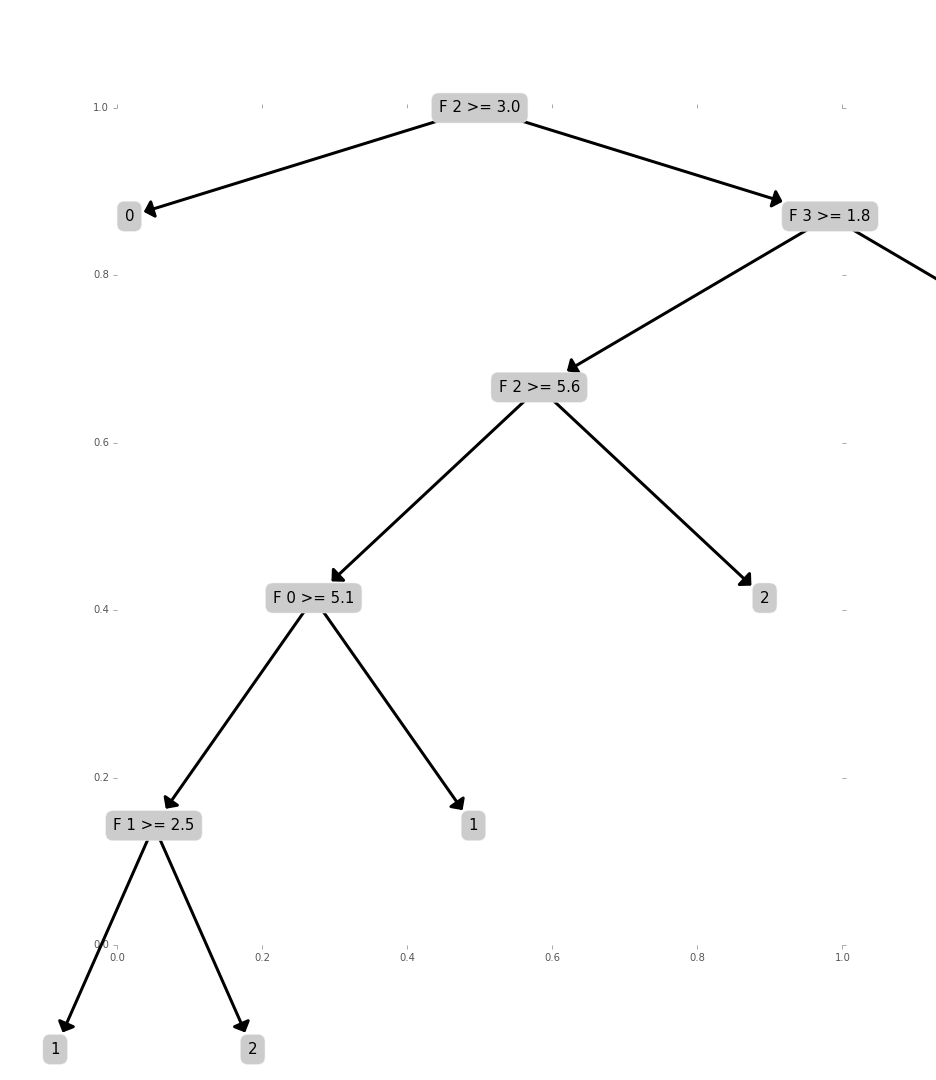

In [116]:
# makes the plot interactive. Allows for panning and zooming.
%matplotlib notebook
# visualize the tree. 
clTree.visualize_tree()

## Regression Trees

For regression, we will generate a dummy dataset following a sin curve so we can visualize the results. 


In [162]:
n_samples = 150
np.random.seed(1)
X = np.expand_dims(np.random.uniform(-np.pi,np.pi, n_samples),1)
y = np.sin(2*X) + np.random.randn(n_samples,1)*0.3

num_items = X.shape[0]
randIdx = np.arange(num_items)

# randomly shuffly the indices
np.random.seed(4) 
np.random.shuffle(randIdx)

test_precentage_split = 0.4

num_test = np.ceil(num_items * test_precentage_split).astype(int)
X_test = X[randIdx[0:num_test]]
y_test = y[randIdx[0:num_test]]

X_train = X[randIdx[num_test:]]
y_train = y[randIdx[num_test:]]

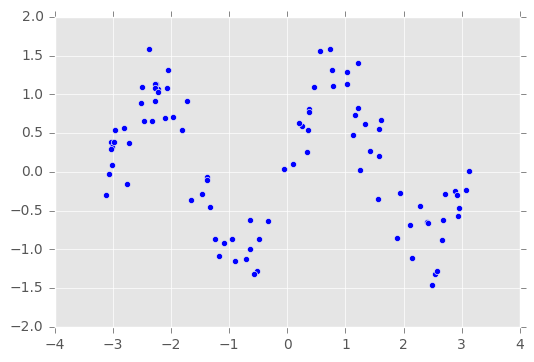

In [163]:
%matplotlib inline
plt.scatter(X_train,y_train)

**Open `regression_tree.py`. **

**(3.)** Implement the functions `compute_variance_reduction`, and `compute_leaf`.

In [164]:
from regression_tree import RegressionTree

In [165]:
rgTree = RegressionTree()
rgTree.train(X_train,y_train)

Mean Squared Error : 1.20579349509
Absolute Relative Error : -0.100711809766


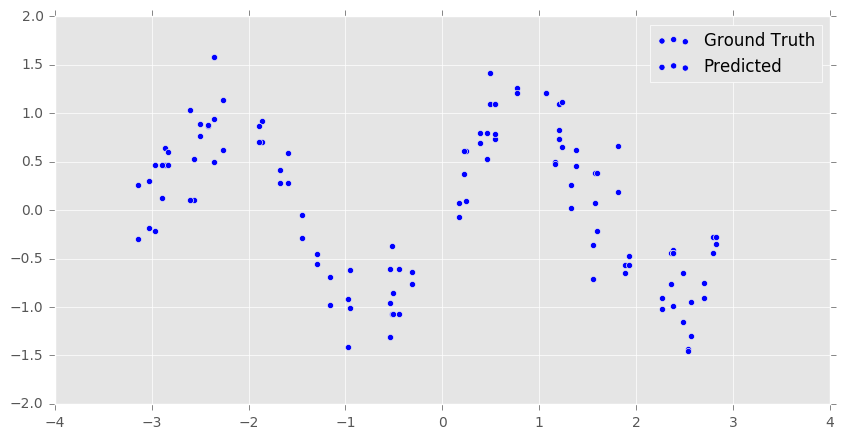

In [166]:
predictions = rgTree.predict(X_test)
MSE = np.mean((predictions - y_test)**2)
print("Mean Squared Error :", MSE)

REL = np.mean(np.abs(predictions - y_test) / y_test)
print("Absolute Relative Error :", REL)

plt.figure(figsize=(10, 5))
# plt.subplot(121)
plt.scatter(X_test, y_test, label='Ground Truth')
# plt.title('Ground Truth')
# plt.subplot(122)
plt.scatter(X_test, predictions, label='Predicted')
# plt.title('Predicted Values')
plt.legend(loc='upper right')

### Regularizing Decision Trees
In the absence of regularization, the decision tree will memorize the training set and achieve 0% error. While this is good in terms of bias, it may not generalize well to never before seen data. (Variance problem)

Modify your code to include three ways of regularization:
- **Minimum samples split**: If the remaining samples are less than the specifed value then we stop splitting and make it a leaf node
- **Max depth**: Restricts the maximum depth of the trees
- **Minimum impurity gain**: If the impurity gain is less than the specified value then we stop splitting and make it a leaf node.

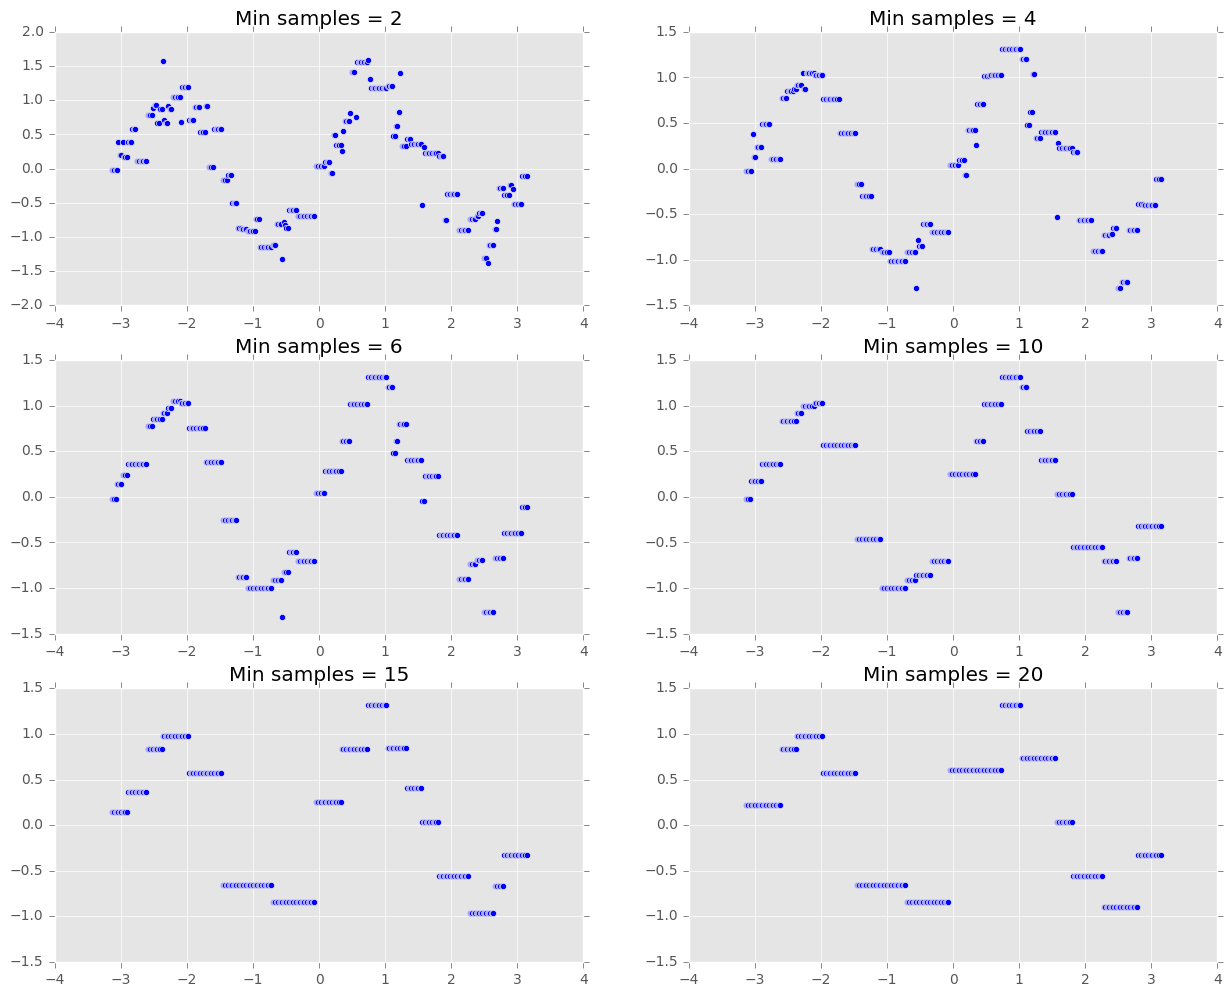

In [167]:
min_samples_split_vals = [2, 4, 6, 10, 15, 20]
plt_ctr = 1
plt.figure(figsize=(15,12))
for val in min_samples_split_vals:
    rgTree = RegressionTree(min_samples_split=val)
    rgTree.train(X,y)
    X_test = np.expand_dims(np.linspace(-np.pi,np.pi,300),-1)
    plt.subplot(3,2,plt_ctr)
    plt.scatter(X_test,rgTree.predict(X_test))
    plt.title("Min samples = "+ str(val))
    plt_ctr += 1

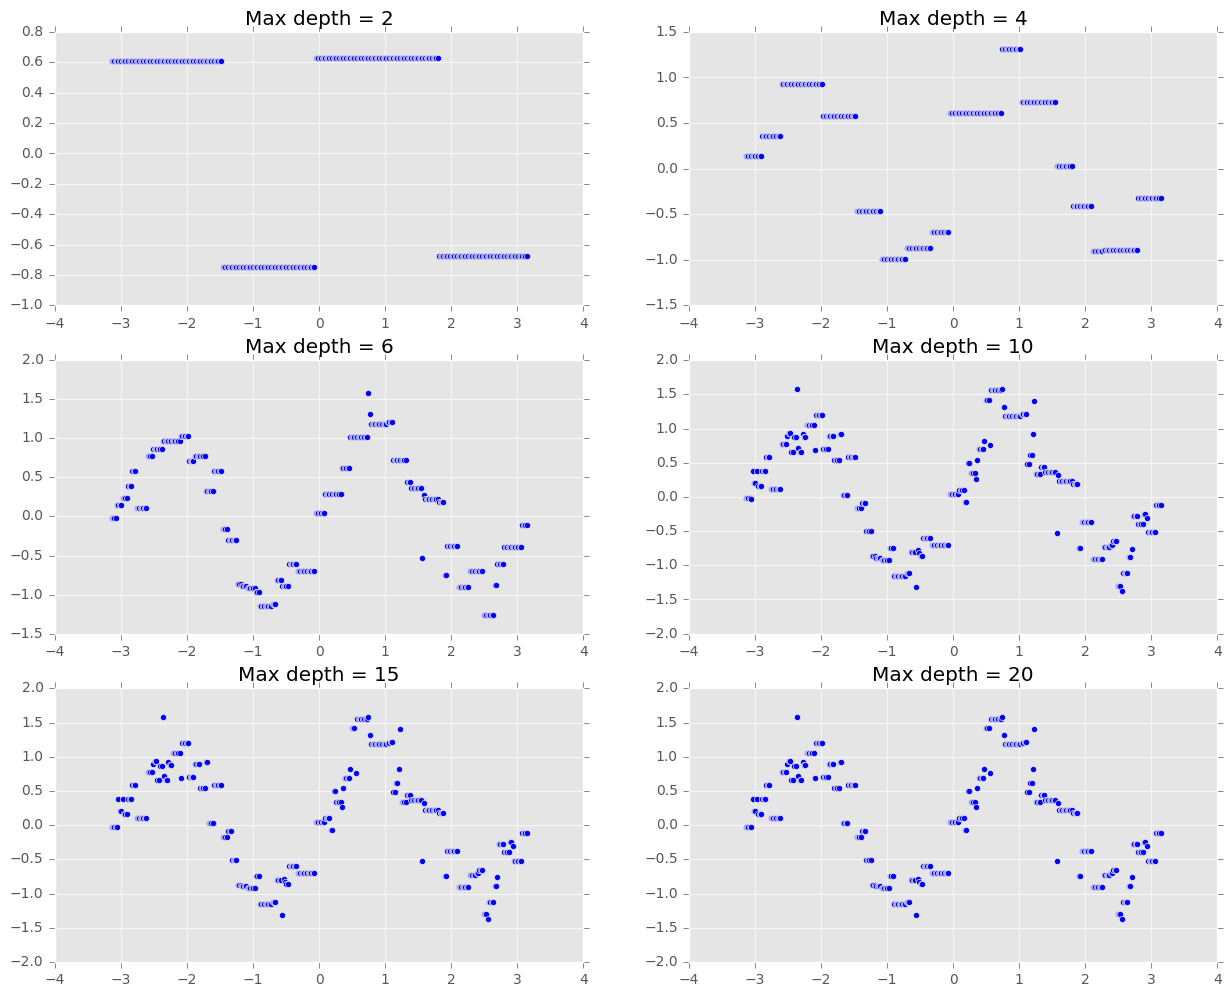

In [168]:
max_depth_vals = [2, 4, 6, 10, 15, 20]
plt_ctr = 1
plt.figure(figsize=(15,12))
for val in max_depth_vals:
    rgTree = RegressionTree(max_depth=val)
    rgTree.train(X,y)
    X_test = np.expand_dims(np.linspace(-np.pi,np.pi,300),-1)
    plt.subplot(3,2,plt_ctr)
    plt.scatter(X_test,rgTree.predict(X_test))
    plt.title("Max depth = "+ str(val))
    plt_ctr += 1

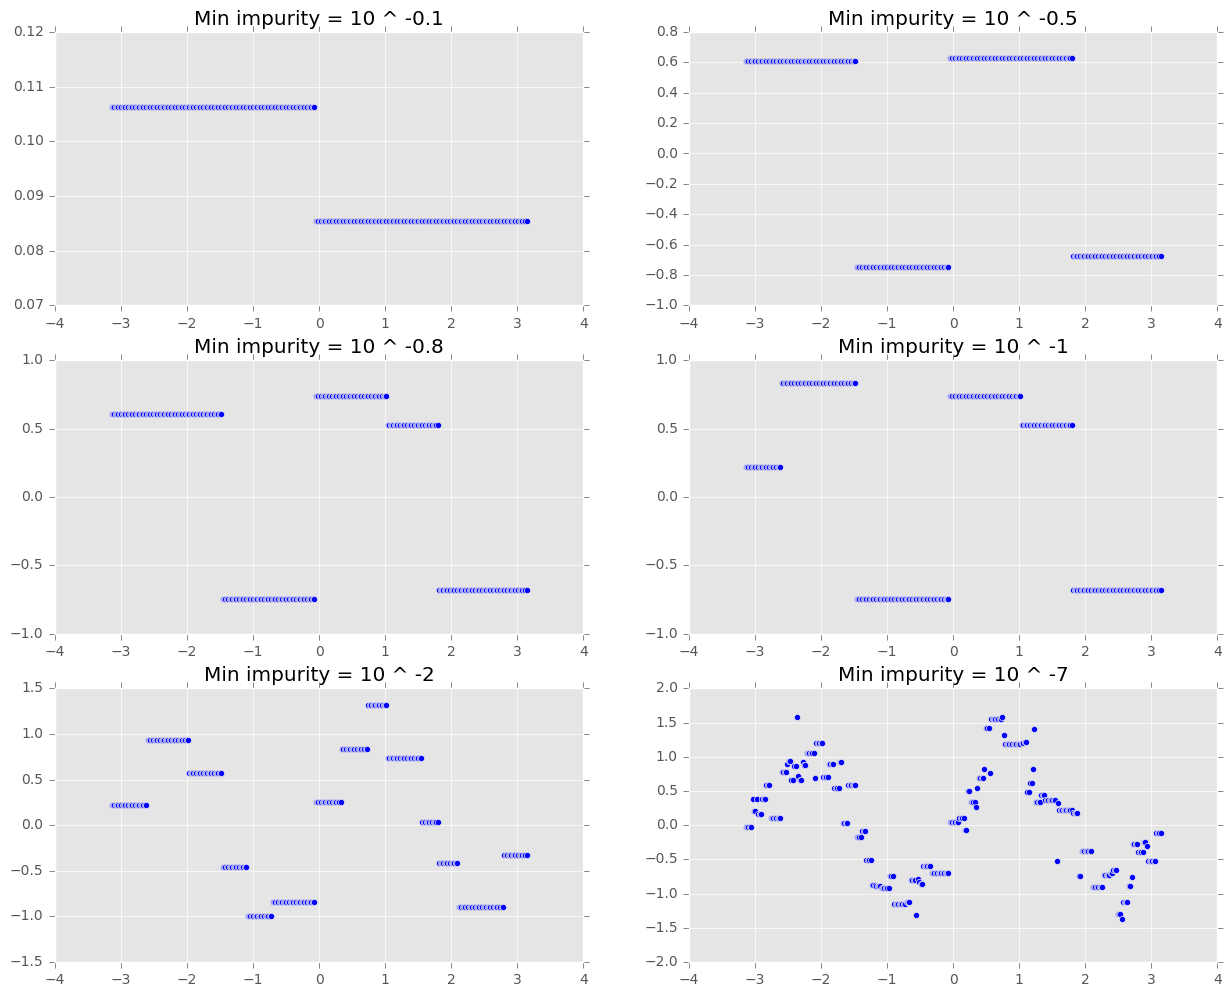

In [169]:
min_impurity_exp = [-0.1, -0.5, -0.8, -1, -2, -7]
plt_ctr = 1
plt.figure(figsize=(15,12))
for val in min_impurity_exp:
    rgTree = RegressionTree(min_impurity=10**val)
    rgTree.train(X,y)
    X_test = np.expand_dims(np.linspace(-np.pi,np.pi,300),-1)
    plt.subplot(3,2,plt_ctr)
    plt.scatter(X_test,rgTree.predict(X_test))
    plt.title("Min impurity = 10 ^ "+ str(val))
    plt_ctr += 1